### *** Instalando Libs Necessarias ***

In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install psycopg2-binary


  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/7b/08/9c66c269b0d417a0af9fb969535f0371b8c538633535a7a6a5ca3f9231e2/psycopg2_binary-2.9.9-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 217.9 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.2 MB 262.6 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.2 MB 326.8 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 599.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.2 MB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.2 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.2 MB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.2 MB 1.5 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### *** Fazendo A Conexao com o Banco de Dados ***

In [5]:
import pandas as pd
from sqlalchemy import create_engine

# Informações do banco de dados
DB_USER = 'codigo_certo_postgresql_user'
DB_PASS = 'LCk9qryd5RftHx6OEz6tl8QTrlMoMV0Z'
DB_HOST = 'dpg-cr52j55umphs73dvte90-a.oregon-postgres.render.com'
DB_PORT = '5432'  # Porta padrão do PostgreSQL
DB_NAME = 'codigo_certo_postgresql'

# String de conexão
CONN_STR = f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

engine = create_engine(CONN_STR)


# Execute uma consulta SQL e carregue o resultado em um DataFrame
df = pd.read_sql('SELECT * FROM respostas_formulario', engine)

In [6]:
df.head(5)

,index,timestamp,nome_completo,whatsapp_numero,interesse_voluntario,nivel_experiencia,areas_interesse,linguagens_ferramentas,frameworks_bibliotecas,disponibilidade_horario,preferencias_colaboracao,liderar_projetos
0,0,23/05/2024 - 22:31:58,Lucas Lima Ribeiro,+5571997276542,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,Java,Spring Boot,Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
1,1,23/05/2024 - 22:32:11,Túlio Victor Pereira Santos,+5585986828297,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,JavaScript;HTML/CSS;MySQL;Git/GitHub;,"React, Nest.Js",Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
2,2,23/05/2024 - 22:32:32,João Nunes Dos Santos,+5547992465252,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Bac...,JavaScript;HTML/CSS;C#;MySQL;Git/GitHub,.Net E Asp.Net.,Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
3,3,23/05/2024 - 22:34:22,Luis Gustavo,+5551993637152,Sim,Não Tenho Experiência,Desenvolvimento Web;Design UX/UI,JavaScript;HTML/CSS,React,Total Disponibilidade,Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
4,4,23/05/2024 - 22:34:24,Dickson Sampaio De Freitas Neto,+5581992285821,Sim,Junior,Desenvolvimento Full Stack;Desenvolvimento Web,JavaScript;Java;MySQL;Git/GitHub,"Spring Boot, React",Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."


### *** Conhecendo a Base de Dados ***

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     171 non-null    int64 
 1   timestamp                 171 non-null    object
 2   nome_completo             171 non-null    object
 3   whatsapp_numero           171 non-null    object
 4   interesse_voluntario      171 non-null    object
 5   nivel_experiencia         171 non-null    object
 6   areas_interesse           171 non-null    object
 7   linguagens_ferramentas    171 non-null    object
 8   frameworks_bibliotecas    171 non-null    object
 9   disponibilidade_horario   171 non-null    object
 10  preferencias_colaboracao  171 non-null    object
 11  liderar_projetos          169 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [52]:
df.shape

(171, 12)

In [56]:
print(df.isnull().sum())

index                       0
timestamp                   0
nome_completo               0
whatsapp_numero             0
interesse_voluntario        0
nivel_experiencia           0
areas_interesse             0
linguagens_ferramentas      0
frameworks_bibliotecas      0
disponibilidade_horario     0
preferencias_colaboracao    0
liderar_projetos            2
dtype: int64


In [57]:
df_cleaned = df.dropna(subset=['liderar_projetos'])
print(df_cleaned.isnull().sum())

index                       0
timestamp                   0
nome_completo               0
whatsapp_numero             0
interesse_voluntario        0
nivel_experiencia           0
areas_interesse             0
linguagens_ferramentas      0
frameworks_bibliotecas      0
disponibilidade_horario     0
preferencias_colaboracao    0
liderar_projetos            0
dtype: int64


### *** Analise Exploratória de Dados  - ( EDA )***

In [58]:
print(df['interesse_voluntario'].value_counts())
print(df['nivel_experiencia'].value_counts())
print(df['areas_interesse'].value_counts())
print(df['linguagens_ferramentas'].value_counts())
print(df['frameworks_bibliotecas'].value_counts())

interesse_voluntario
Sim    159
Não     12
Name: count, dtype: int64
nivel_experiencia
Não Tenho Experiência    102
Junior                    64
Pleno                      4
Senior                     1
Name: count, dtype: int64
areas_interesse
Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend                                            30
Desenvolvimento Web                                                                                               18
Desenvolvimento Backend                                                                                           16
Desenvolvimento Full Stack;Desenvolvimento Web                                                                     8
Desenvolvimento Web;Desenvolvimento Backend                                                                        7
                                                                                                                  ..
Desenvolvimento Full Stack;Banco de dados            

In [59]:
df_grouped_experience = df.groupby('nivel_experiencia')['nome_completo'].count()
print(df_grouped_experience)


df_grouped_areas = df['areas_interesse'].str.split(';').explode().value_counts()
print(df_grouped_areas)


nivel_experiencia
Junior                    64
Não Tenho Experiência    102
Pleno                      4
Senior                     1
Name: nome_completo, dtype: int64
areas_interesse
Desenvolvimento Web              112
Desenvolvimento Backend          100
Desenvolvimento Full Stack        92
Desenvolvimento Mobile            34
Ciência de Dados                  32
DevOps                            22
Design UX/UI                      21
                                   2
Análise de Dados                   1
Cloud computing                    1
SM                                 1
cloud AWS                          1
iOS                                1
Desenvolvimento front end          1
Cloud (AWS) e Cibersegurança.      1
Front-end                          1
Banco de dados                     1
QA                                 1
Analista de Teste/ QA              1
Java                               1
Test funcional front end           1
Analista QA                        1
Qu

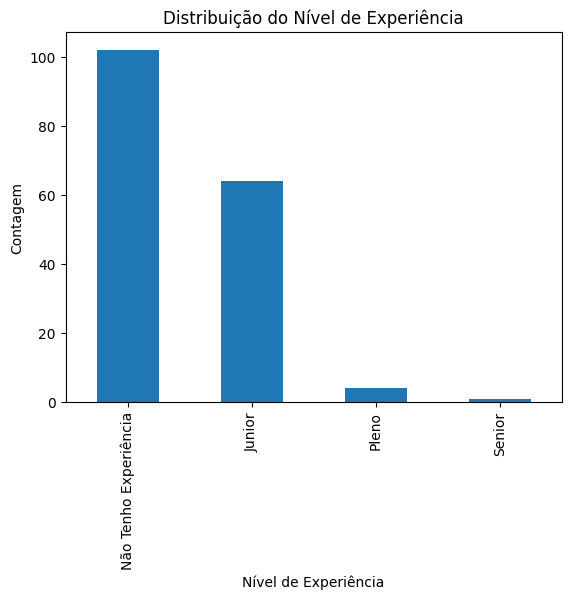

In [60]:
import matplotlib.pyplot as plt

# Gráfico de barras para o nível de experiência
df['nivel_experiencia'].value_counts().plot(kind='bar')
plt.title('Distribuição do Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')
plt.show()

In [61]:
# Tabela de Nível de Experiência
nivel_experiencia_tab = df['nivel_experiencia'].value_counts()
print(nivel_experiencia_tab)

nivel_experiencia
Não Tenho Experiência    102
Junior                    64
Pleno                      4
Senior                     1
Name: count, dtype: int64


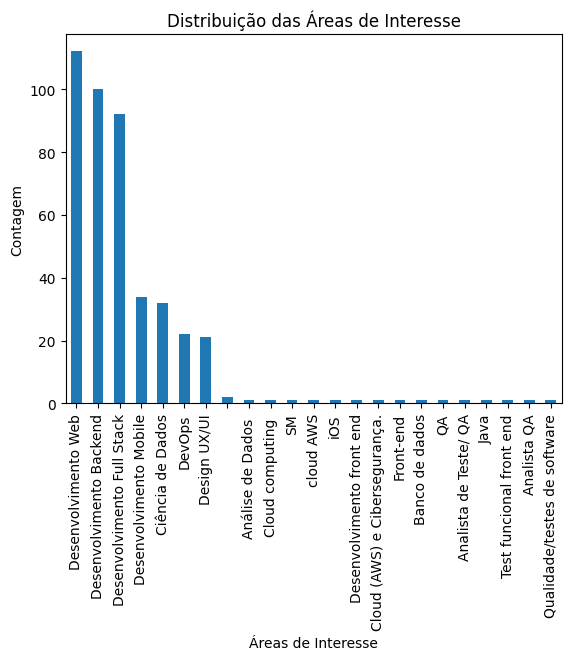

In [62]:
# Gráfico de barras para as áreas de interesse
df_grouped_areas.plot(kind='bar')
plt.title('Distribuição das Áreas de Interesse')
plt.xlabel('Áreas de Interesse')
plt.ylabel('Contagem')
plt.show()

In [63]:
# Tabela de Áreas de Interesse
areas_interesse_tab = df['areas_interesse'].value_counts()
print(areas_interesse_tab)

areas_interesse
Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend                                            30
Desenvolvimento Web                                                                                               18
Desenvolvimento Backend                                                                                           16
Desenvolvimento Full Stack;Desenvolvimento Web                                                                     8
Desenvolvimento Web;Desenvolvimento Backend                                                                        7
                                                                                                                  ..
Desenvolvimento Full Stack;Banco de dados                                                                          1
Desenvolvimento Full Stack;Análise de Dados                                                                        1
Desenvolvimento Full Stack;Desenvolvimento Web;D

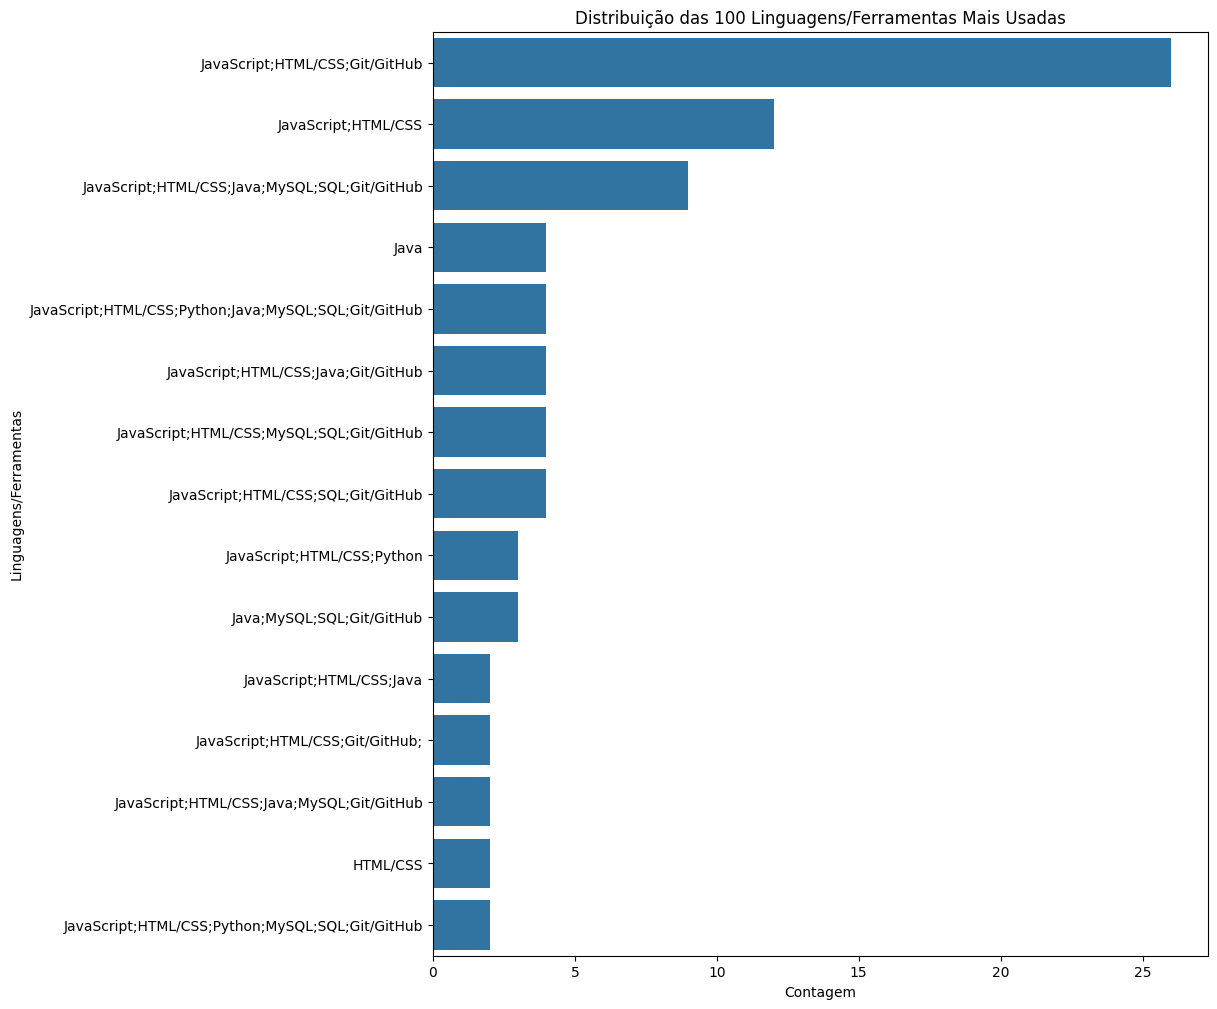

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

top_100_linguagens_ferramentas = df['linguagens_ferramentas'].value_counts().nlargest(15)

plt.figure(figsize=(10, 12))  
sns.countplot(y=pd.Categorical(df['linguagens_ferramentas'], categories=top_100_linguagens_ferramentas.index), 
              order=top_100_linguagens_ferramentas.index)
plt.title('Distribuição das 100 Linguagens/Ferramentas Mais Usadas')
plt.xlabel('Contagem')
plt.ylabel('Linguagens/Ferramentas')
plt.show()


In [65]:
# Tabela de Linguagens/Ferramentas
linguagens_ferramentas_tab = df['linguagens_ferramentas'].value_counts()
print(linguagens_ferramentas_tab)

linguagens_ferramentas
JavaScript;HTML/CSS;Git/GitHub                          26
JavaScript;HTML/CSS                                     12
JavaScript;HTML/CSS;Java;MySQL;SQL;Git/GitHub            9
Java                                                     4
JavaScript;HTML/CSS;Python;Java;MySQL;SQL;Git/GitHub     4
                                                        ..
JavaScript;HTML/CSS;PHP;SQL;Git/GitHub                   1
JavaScript;Python;Java;MySQL;SQL                         1
C#                                                       1
Python;Git/GitHub                                        1
Python;MySQL;SQL;Git/GitHub                              1
Name: count, Length: 93, dtype: int64


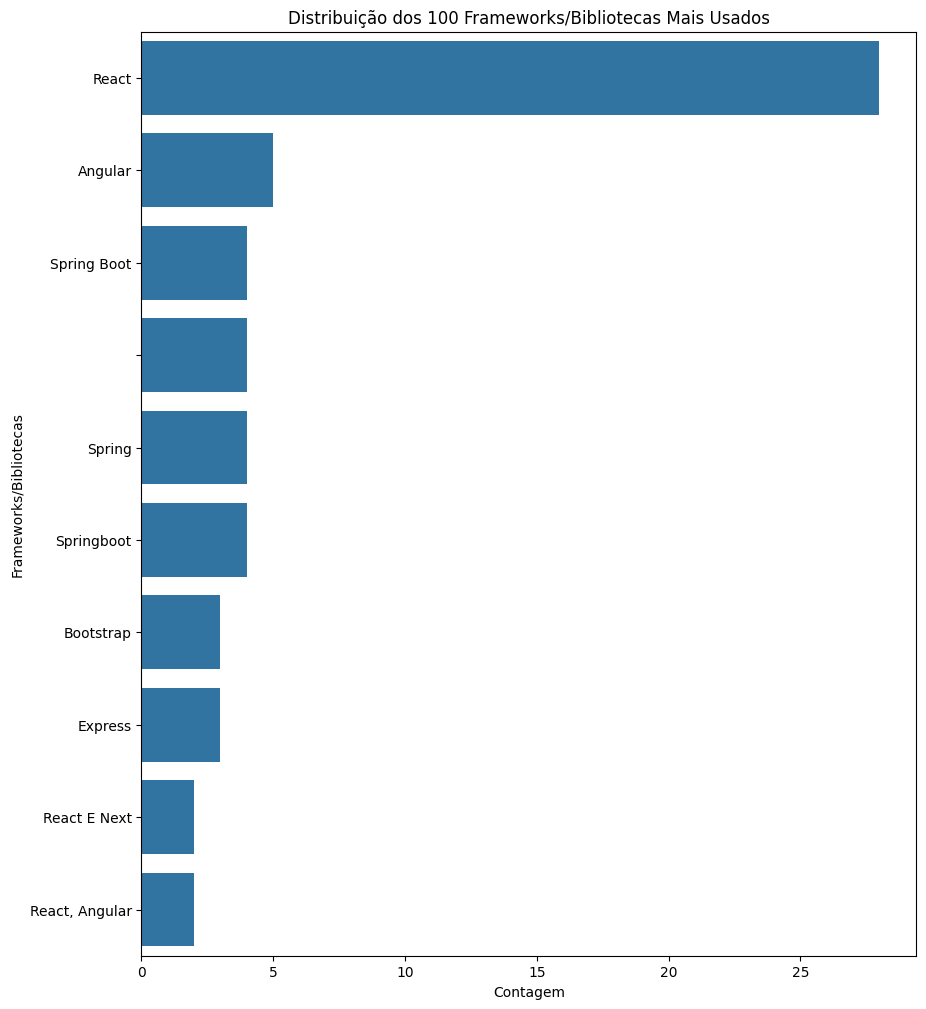

In [66]:
top_100_frameworks_bibliotecas = df['frameworks_bibliotecas'].value_counts().nlargest(10)

plt.figure(figsize=(10, 12))  # Ajustar o tamanho da figura para melhor visualização
sns.countplot(y=pd.Categorical(df['frameworks_bibliotecas'], categories=top_100_frameworks_bibliotecas.index), 
              order=top_100_frameworks_bibliotecas.index)
plt.title('Distribuição dos 100 Frameworks/Bibliotecas Mais Usados')
plt.xlabel('Contagem')
plt.ylabel('Frameworks/Bibliotecas')
plt.show()

In [67]:
# Tabela de Frameworks/Bibliotecas
frameworks_bibliotecas_tab = df['frameworks_bibliotecas'].value_counts()
print(frameworks_bibliotecas_tab)

frameworks_bibliotecas
React                                                                             28
Angular                                                                            5
Spring Boot                                                                        4
                                                                                   4
Spring                                                                             4
                                                                                  ..
React.Js, Next.Js, React Native, Figma                                             1
React Mas Estou Iniciando Os Estudos Nele                                          1
Ainda Estou Estudando As Linguagens Pura, Mais Pretendo Estudar O Spring Boot.     1
Spring Boot, Spring Security, Node                                                 1
Javascript                                                                         1
Name: count, Length: 118, dtype: int64


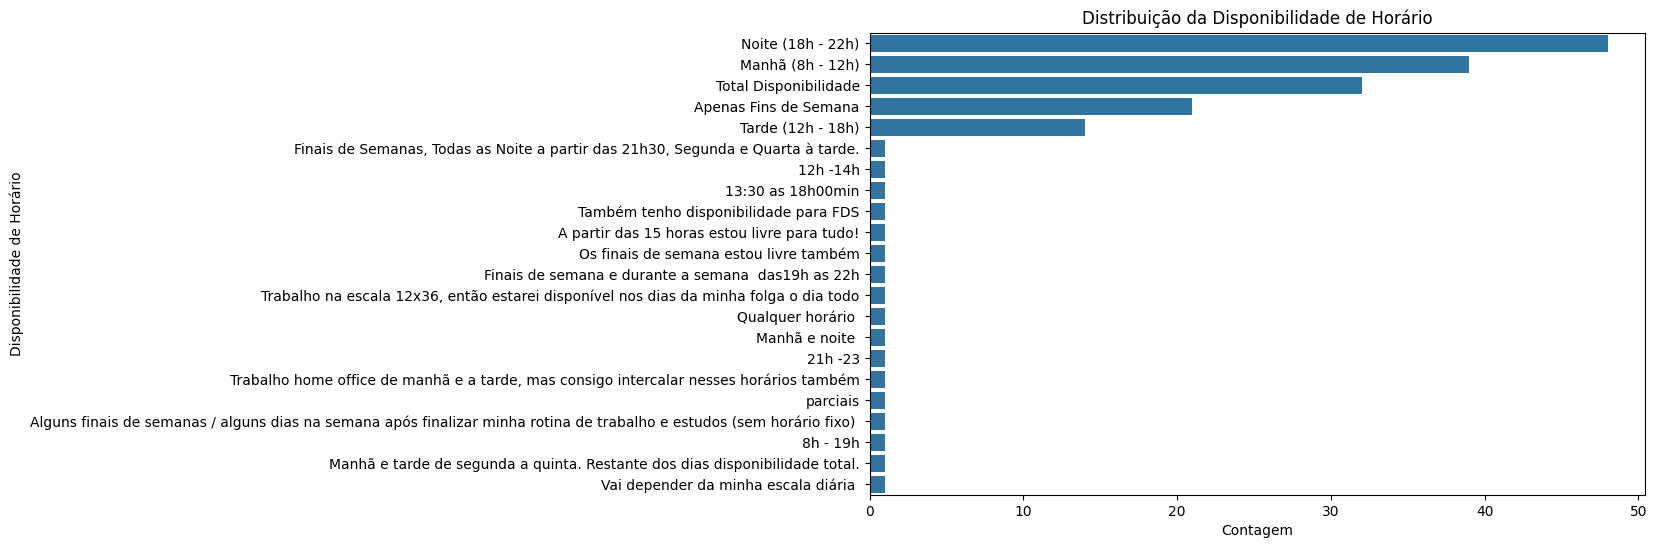

In [68]:
# 5. Distribuição de disponibilidade_horario
plt.figure(figsize=(10, 6))
sns.countplot(y=df['disponibilidade_horario'], order=df['disponibilidade_horario'].value_counts().index)
plt.title('Distribuição da Disponibilidade de Horário')
plt.xlabel('Contagem')
plt.ylabel('Disponibilidade de Horário')
plt.show()

In [69]:
#Tabela de Disponibilidade de Horário
disponibilidade_horario_tab = df['disponibilidade_horario'].value_counts()
print(disponibilidade_horario_tab)

disponibilidade_horario
Noite (18h - 22h)                                                                                                         48
Manhã (8h - 12h)                                                                                                          39
Total Disponibilidade                                                                                                     32
Apenas Fins de Semana                                                                                                     21
Tarde (12h - 18h)                                                                                                         14
Finais de Semanas, Todas as Noite a partir das 21h30, Segunda e Quarta à tarde.                                            1
12h -14h                                                                                                                   1
13:30 as 18h00min                                                                                    

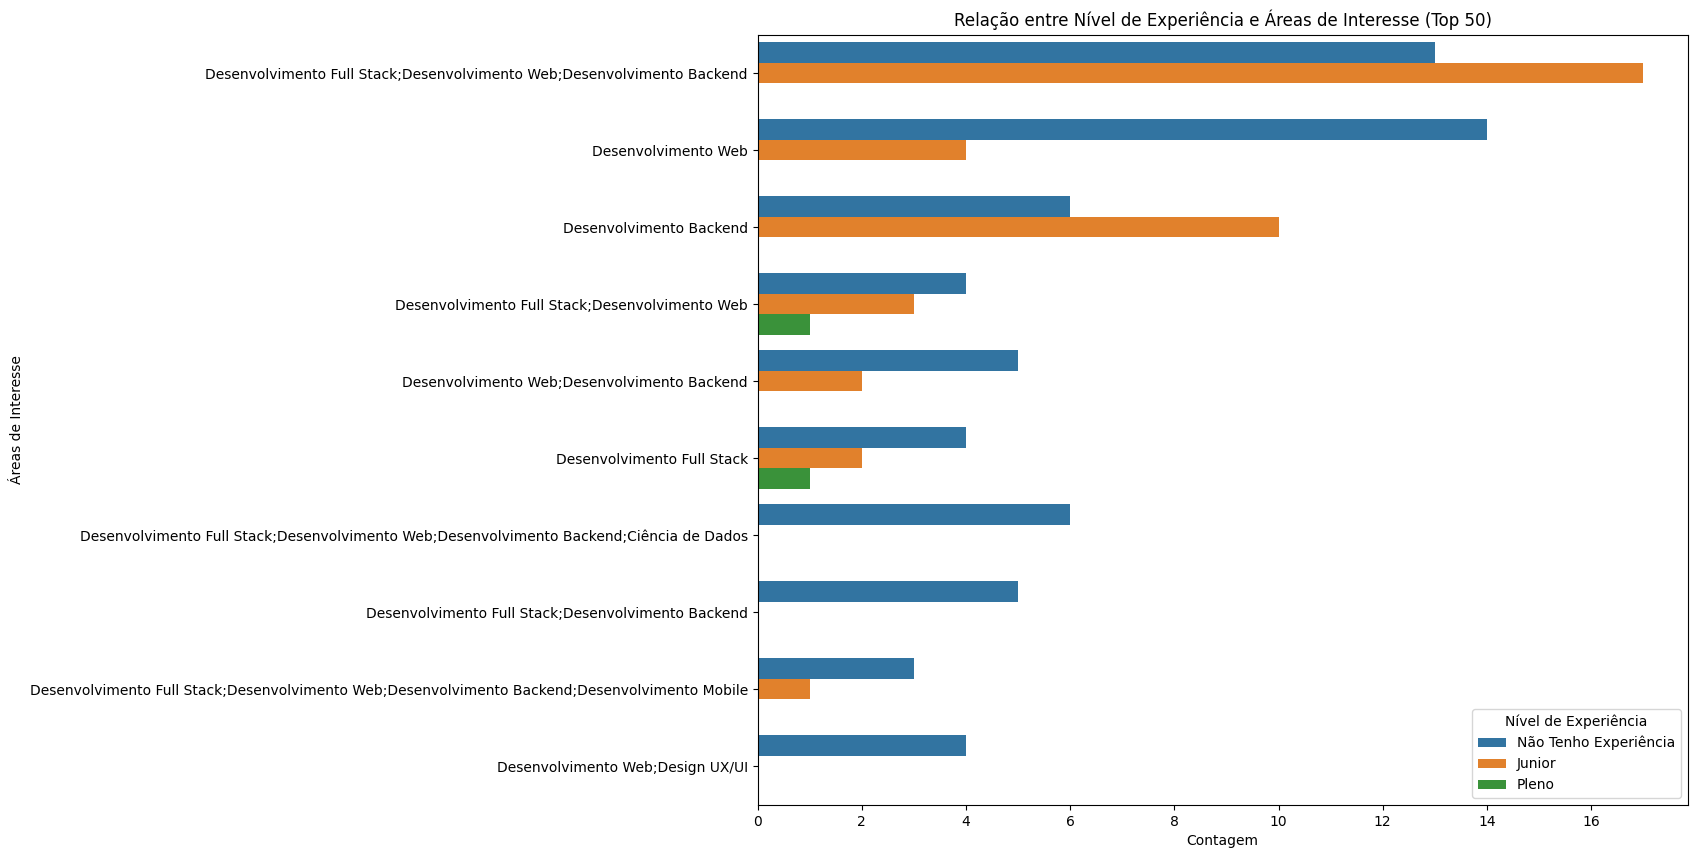

In [70]:

# Selecionar as 50 áreas de interesse mais frequentes
top_50_areas = df['areas_interesse'].value_counts().nlargest(10).index
df_top_50 = df[df['areas_interesse'].isin(top_50_areas)]

# Criar o gráfico de relação entre nível de experiência e áreas de interesse
plt.figure(figsize=(12, 10))  # Ajustar o tamanho da figura
sns.countplot(y=df_top_50['areas_interesse'], hue=df_top_50['nivel_experiencia'], order=top_50_areas)
plt.title('Relação entre Nível de Experiência e Áreas de Interesse (Top 50)')
plt.xlabel('Contagem')
plt.ylabel('Áreas de Interesse')
plt.legend(title='Nível de Experiência')
plt.show()


In [71]:
# Tabela da Relação entre Nível de Experiência e Áreas de Interesse
nivel_areas_tab = pd.crosstab(df['areas_interesse'], df['nivel_experiencia'])
print(nivel_areas_tab)


nivel_experiencia                                Junior  \
areas_interesse                                           
Analista de Teste/ QA                                 0   
Ciência de Dados                                      1   
Desenvolvimento Backend                              10   
Desenvolvimento Backend;Ciência de Dados              1   
Desenvolvimento Backend;Ciência de Dados;DevOps       0   
...                                                 ...   
DevOps                                                0   
DevOps;Cloud computing                                1   
QA                                                    1   
Qualidade/testes de software                          1   
Test funcional front end                              0   

nivel_experiencia                                Não Tenho Experiência  Pleno  \
areas_interesse                                                                 
Analista de Teste/ QA                                                1

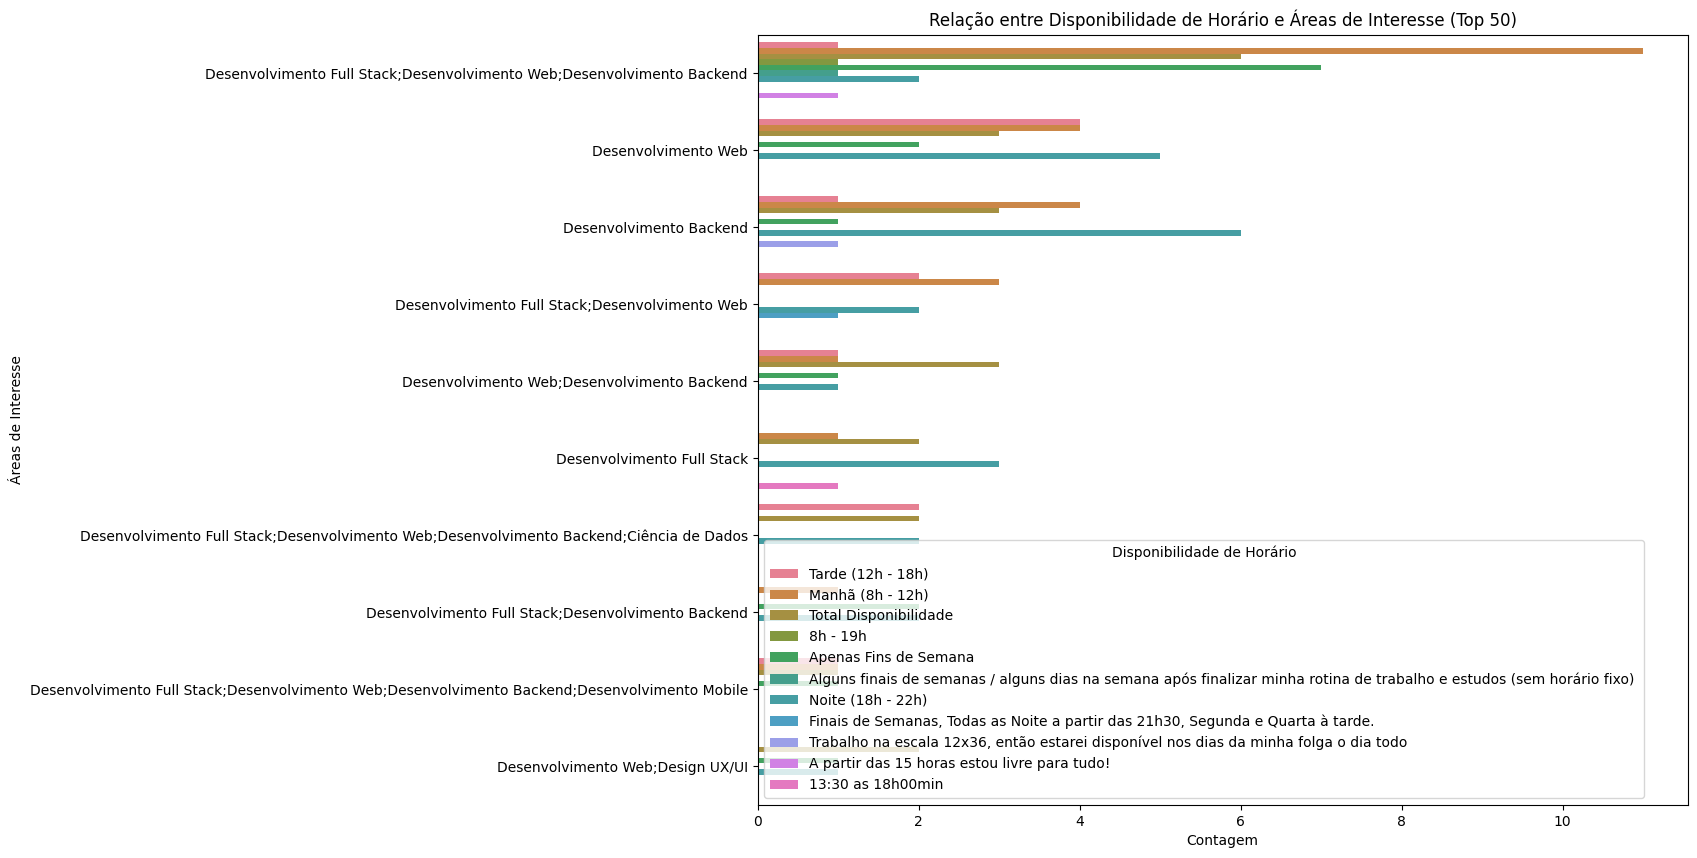

In [72]:
# Selecionar as 50 áreas de interesse mais frequentes
top_50_areas = df['areas_interesse'].value_counts().nlargest(10).index
df_top_50 = df[df['areas_interesse'].isin(top_50_areas)]

# Criar o gráfico de relação entre disponibilidade de horário e áreas de interesse
plt.figure(figsize=(12, 10))  # Ajustar o tamanho da figura
sns.countplot(y=df_top_50['areas_interesse'], hue=df_top_50['disponibilidade_horario'], order=top_50_areas)
plt.title('Relação entre Disponibilidade de Horário e Áreas de Interesse (Top 50)')
plt.xlabel('Contagem')
plt.ylabel('Áreas de Interesse')
plt.legend(title='Disponibilidade de Horário')
plt.show()


In [73]:
# Tabela da Relação entre Disponibilidade de Horário e Áreas de Interesse
disponibilidade_areas_tab = pd.crosstab(df['areas_interesse'], df['disponibilidade_horario'])
print(disponibilidade_areas_tab)

disponibilidade_horario                          12h -14h  13:30 as 18h00min  \
areas_interesse                                                                
Analista de Teste/ QA                                   0                  0   
Ciência de Dados                                        0                  0   
Desenvolvimento Backend                                 0                  0   
Desenvolvimento Backend;Ciência de Dados                0                  0   
Desenvolvimento Backend;Ciência de Dados;DevOps         0                  0   
...                                                   ...                ...   
DevOps                                                  0                  0   
DevOps;Cloud computing                                  0                  0   
QA                                                      0                  0   
Qualidade/testes de software                            0                  0   
Test funcional front end                

In [74]:
df.columns

Index(['index', 'timestamp', 'nome_completo', 'whatsapp_numero',
       'interesse_voluntario', 'nivel_experiencia', 'areas_interesse',
       'linguagens_ferramentas', 'frameworks_bibliotecas',
       'disponibilidade_horario', 'preferencias_colaboracao',
       'liderar_projetos'],
      dtype='object')

In [75]:
df.head(5)

,index,timestamp,nome_completo,whatsapp_numero,interesse_voluntario,nivel_experiencia,areas_interesse,linguagens_ferramentas,frameworks_bibliotecas,disponibilidade_horario,preferencias_colaboracao,liderar_projetos
0,0,23/05/2024 - 22:31:58,Lucas Lima Ribeiro,+5571997276542,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,Java,Spring Boot,Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
1,1,23/05/2024 - 22:32:11,Túlio Victor Pereira Santos,+5585986828297,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,JavaScript;HTML/CSS;MySQL;Git/GitHub;,"React, Nest.Js",Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
2,2,23/05/2024 - 22:32:32,João Nunes Dos Santos,+5547992465252,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Bac...,JavaScript;HTML/CSS;C#;MySQL;Git/GitHub,.Net E Asp.Net.,Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
3,3,23/05/2024 - 22:34:22,Luis Gustavo,+5551993637152,Sim,Não Tenho Experiência,Desenvolvimento Web;Design UX/UI,JavaScript;HTML/CSS,React,Total Disponibilidade,Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
4,4,23/05/2024 - 22:34:24,Dickson Sampaio De Freitas Neto,+5581992285821,Sim,Junior,Desenvolvimento Full Stack;Desenvolvimento Web,JavaScript;Java;MySQL;Git/GitHub,"Spring Boot, React",Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
